In [1]:
### IMPORT SCIENTIFIC LIBRARIES ###
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
import pandas as pd
from scipy.optimize import curve_fit

from functions import *
from alias import *

In [2]:
# fontsizes
plt.rcParams['font.size'] = 14
plt.rcParams['axes.labelsize'] = 18

In [ ]:
## LOAD REDUCED DATA
red = {}
for T in [160, 200, 300]:
    red[T] = pd.read_csv('./data/reddata/red_'+str(T)+'K.csv')
red['V'] = pd.read_csv('./data/reddata/red_V.csv')

red_HR = {}
for T in [160, 200, 300]:
    red_HR[T] = pd.read_csv('./data/reddata/red_'+str(T)+'K_HR.csv')
red_HR['V'] = pd.read_csv('./data/reddata/red_V_HR.csv')

# Detailed balance check
$$
\frac{S_{stokes}}{S_{anti-stokes}} = e^{\frac{\hbar \omega}{k_B T}}
$$

In [5]:
kB = 8.617333262e-2 # meV/K

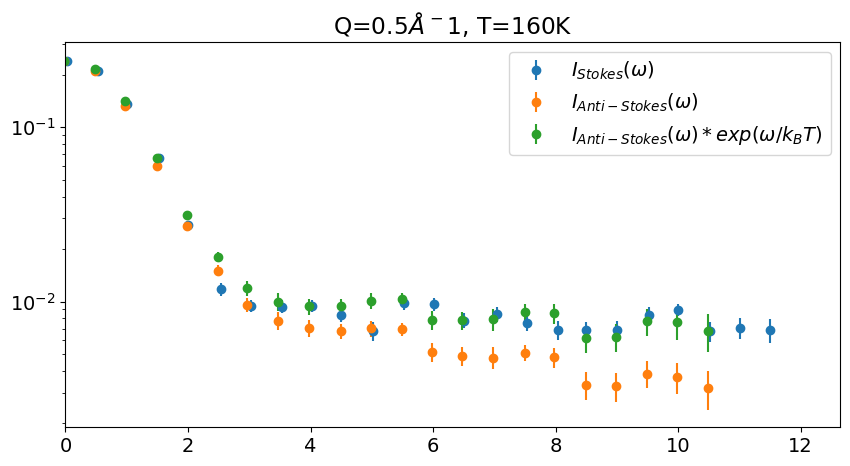

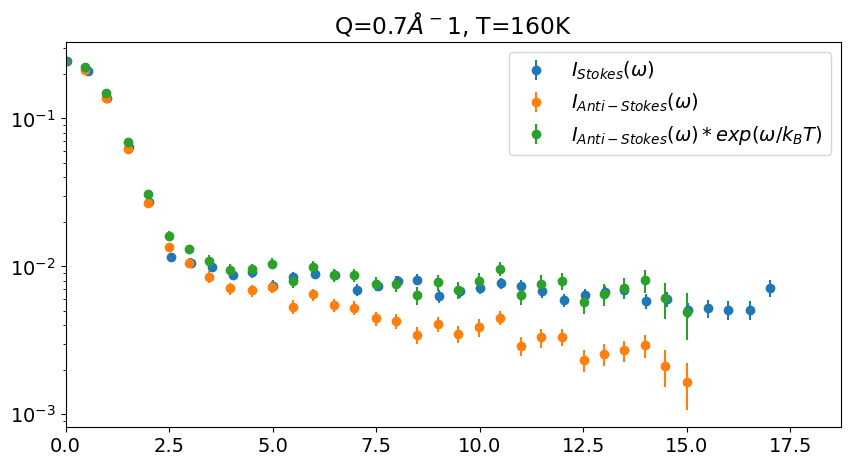

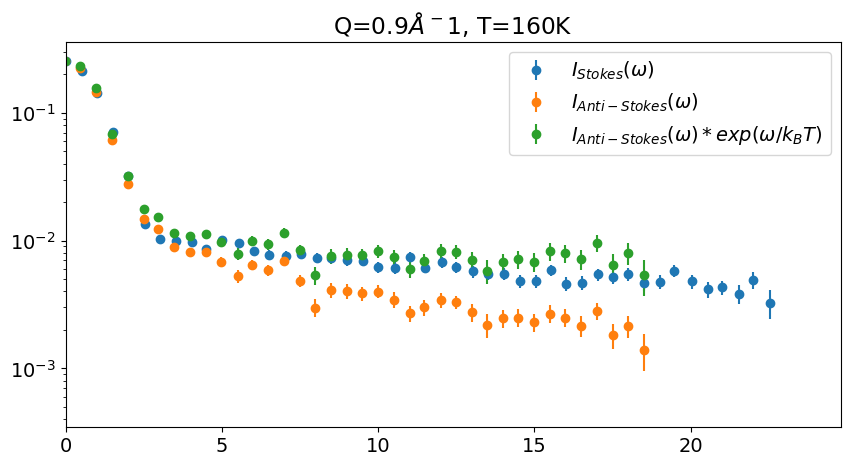

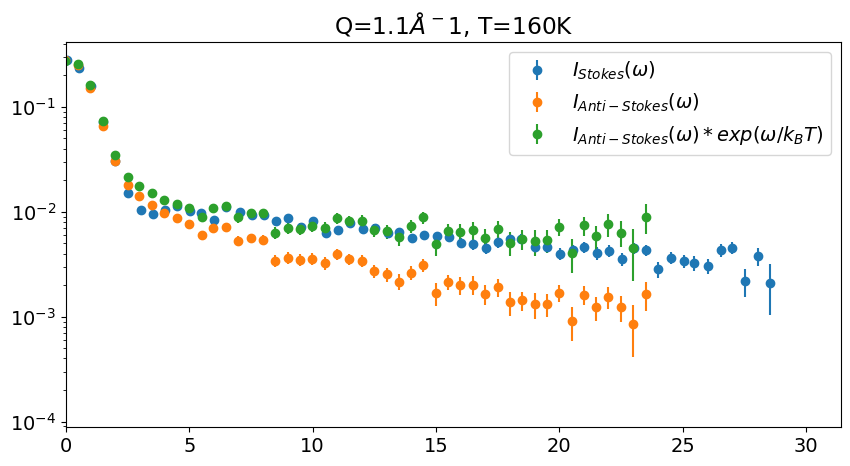

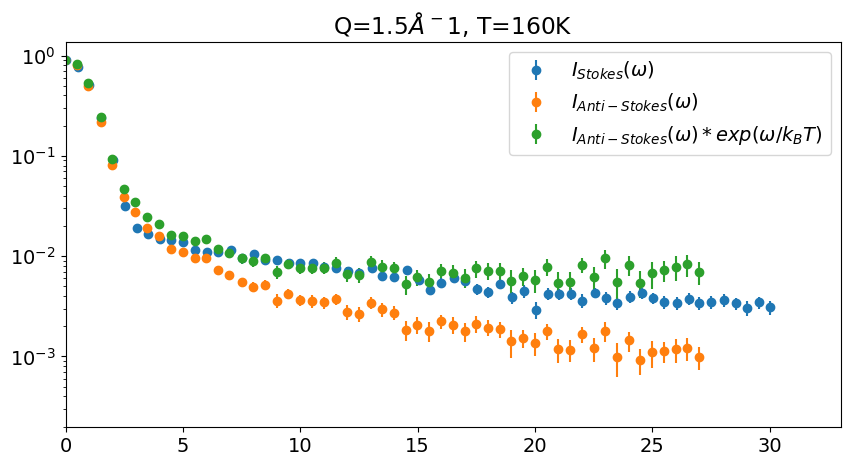

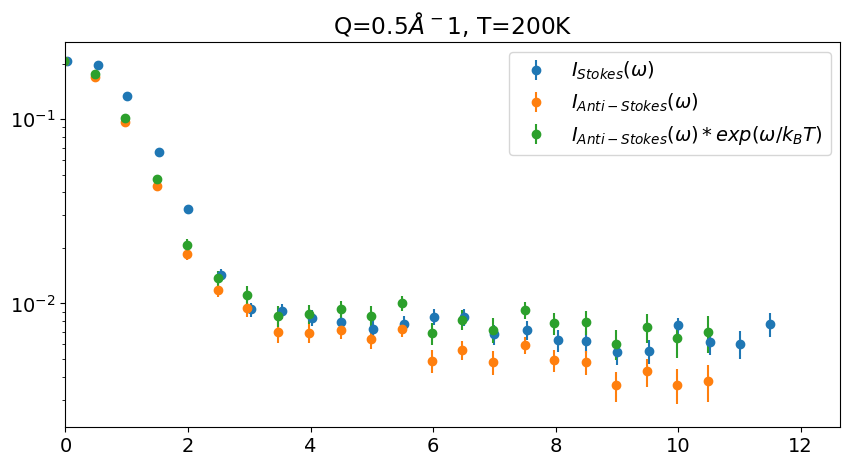

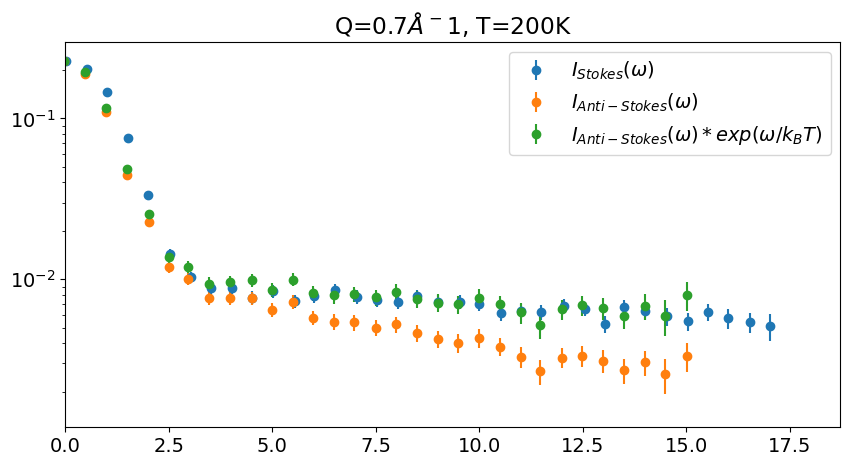

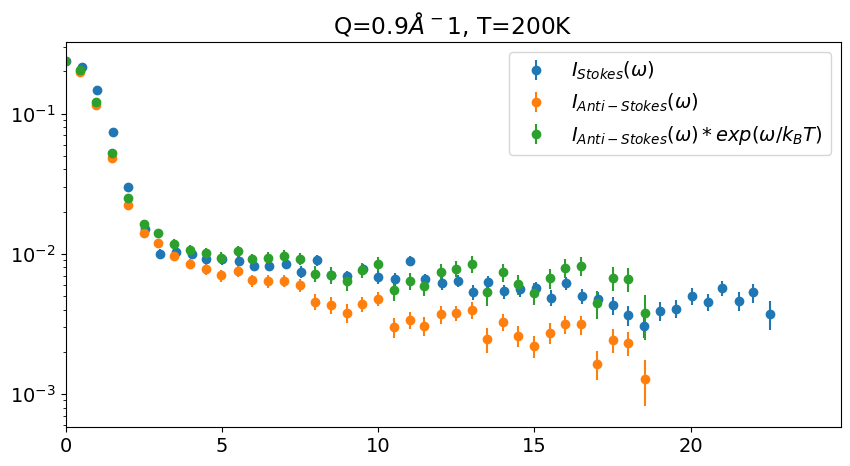

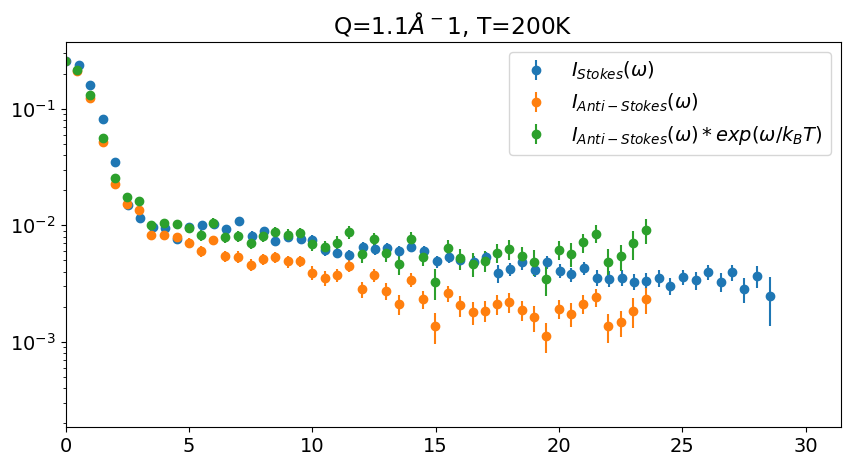

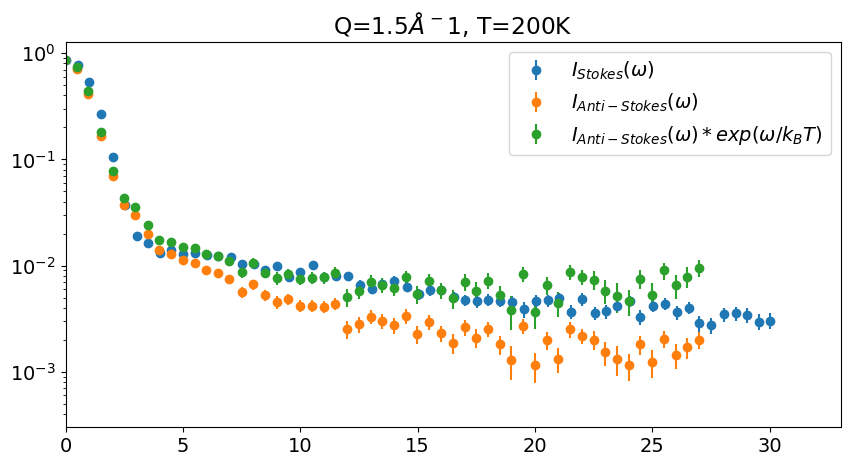

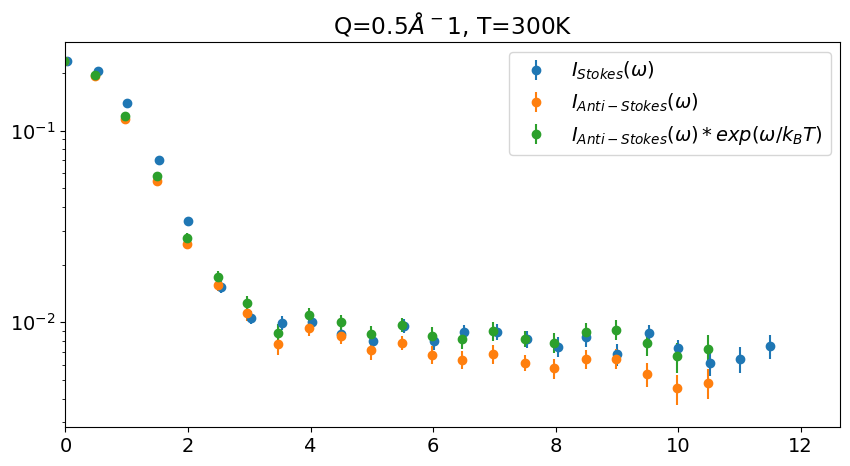

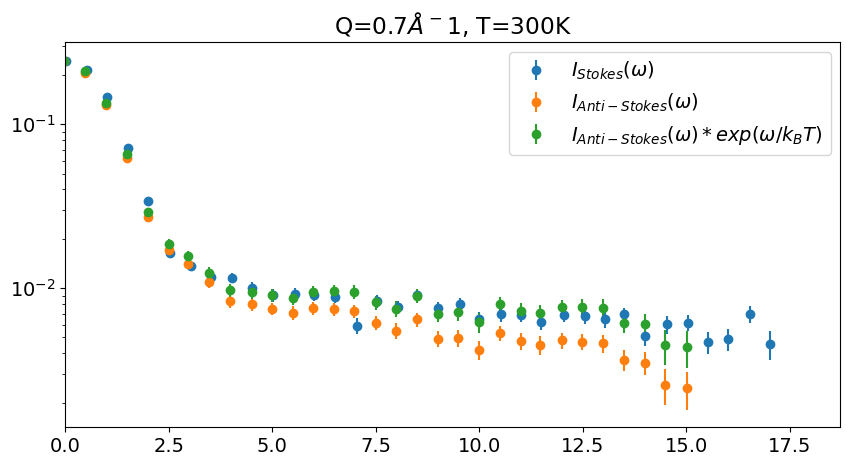

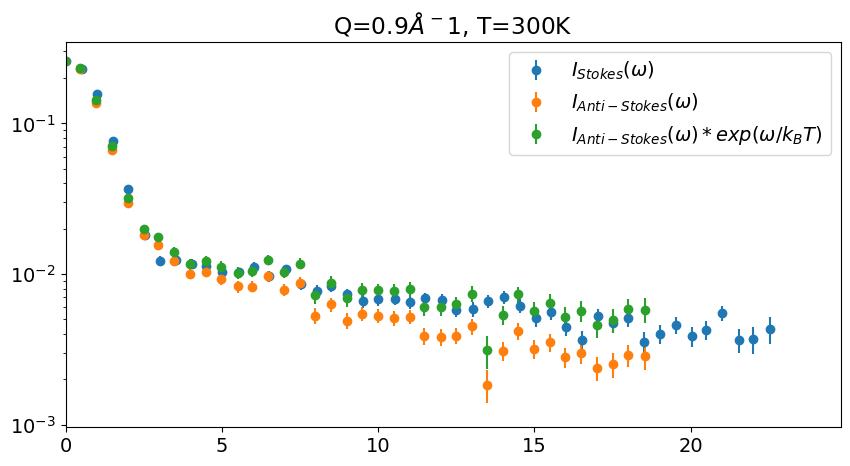

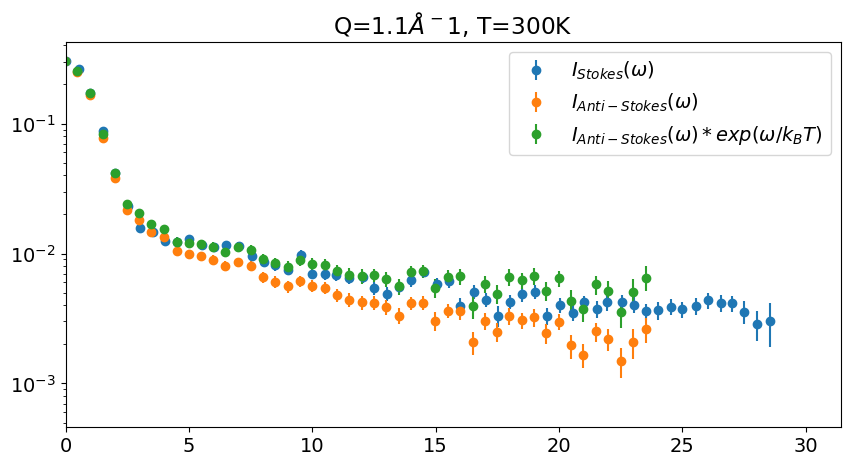

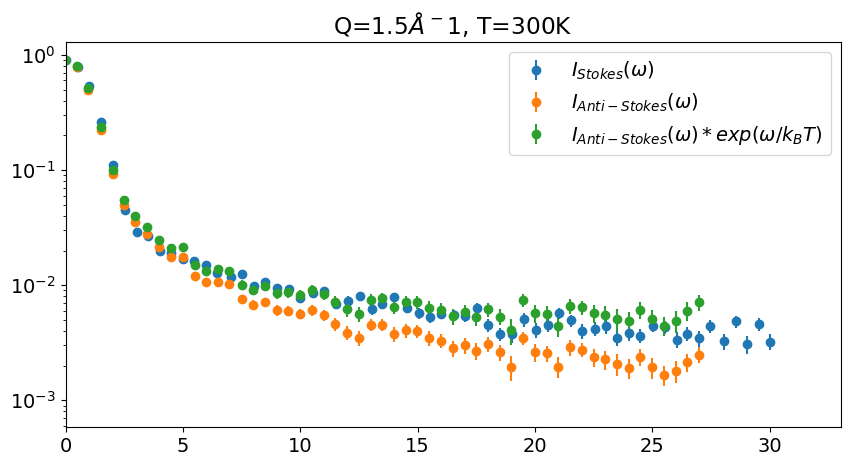

In [7]:
for T in [160, 200, 300]:
    for q in Qs:
        S = get_spec(red[T], q)

        plt.figure(figsize=(10,5))
        plt.title(f'Q={q}$\\AA^{-1}$, T={T}K')

        plt.errorbar(S.omega, S.I, yerr=S.dI, fmt='o', label=r'$I_{Stokes}(\omega)$')
        plt.errorbar(-S.omega, S.I, yerr=S.dI, fmt='o', label=r'$I_{Anti-Stokes}(\omega)$')
        plt.errorbar(-S.omega, S.I * np.exp(-S.omega/(kB*T)), yerr=S.dI * np.exp(-S.omega/(kB*T)), fmt='o', label=r'$I_{Anti-Stokes}(\omega) * exp(\omega/k_BT)$')

        plt.xlim(0)
        plt.yscale('log')
        plt.legend()